    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

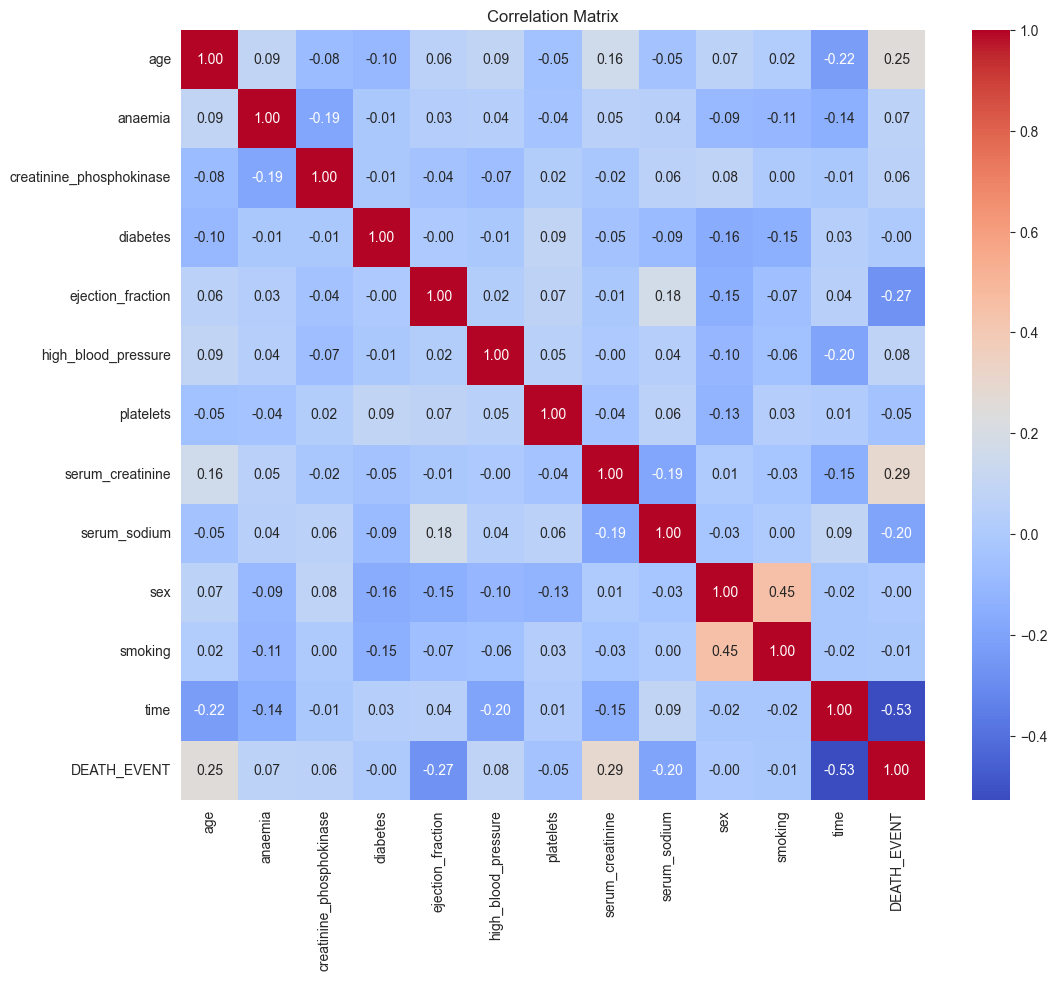

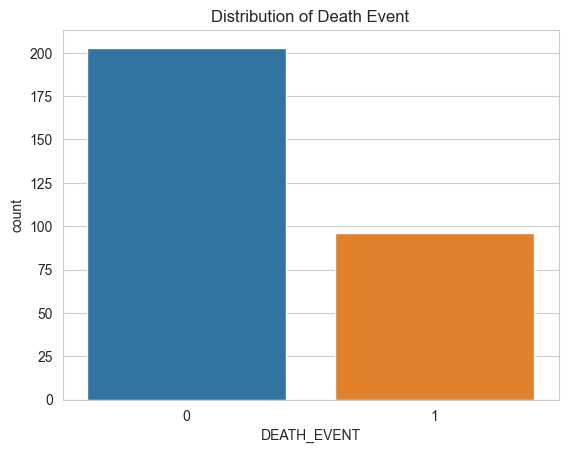

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Visualize the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Visualize the distribution of the target variable
sns.countplot(x='DEATH_EVENT', data=df)
plt.title("Distribution of Death Event")
plt.show()

In [16]:
# Separate features and target variable
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Define hyperparameters for grid search
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'Logistic Regression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
}

# Perform GridSearchCV for each model
best_models = {}
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate models on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    print(f"\nEvaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 50}
Best parameters for Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Best parameters for K-Nearest Neighbors: {'n_neighbors': 7, 'weights': 'uniform'}
Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}

Evaluation for Random Forest:
Accuracy: 0.7667
AUC-ROC: 0.7257
Confusion Matrix:
[[34  1]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        35
           1       0.92      0.48      0.63        25

    accuracy                           0.77        60
   macro avg       0.82      0.73      0.73        60
weighted avg       0.81      0.77      0.75        60


Evaluation for Support Vector Machine:
Accuracy: 0.8000
AUC-ROC: 0.7714
Confusion Matrix:
[[33  2]
 [10 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
          


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/aristarcharistarchovich/DataspellProjects/newPython/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 61, in _check_solv

3a

In [17]:
import eli5

# Fit a Logistic Regression model (using the best parameters from the grid search)
logistic_regression_model = best_models['Logistic Regression']
logistic_regression_model.fit(X_train_scaled, y_train)

# Visualize feature weights
eli5.show_weights(logistic_regression_model, feature_names=list(X.columns))

Weight?,Feature
+0.702,serum_creatinine
+0.661,age
+0.164,diabetes
+0.111,creatinine_phosphokinase
+0.071,smoking
-0.052,anaemia
-0.061,high_blood_pressure
-0.170,platelets
-0.260,serum_sodium
-0.362,sex


To explain specific predictions:

In [24]:
# Pick a row with a negative label
negative_label_indices = y_test[y_test == 0].index
negative_label_index = negative_label_indices[0] if len(negative_label_indices) > 0 else None

positive_label_indices = y_test[y_test == 1].index
positive_label_index = positive_label_indices[0] if len(positive_label_indices) > 0 else None

if negative_label_index is not None and positive_label_index is not None:
    negative_label_instance = pd.DataFrame([X_test_scaled[negative_label_index]], columns=list(X.columns))
    positive_label_instance = pd.DataFrame([X_test_scaled[positive_label_index]], columns=list(X.columns))

    eli5.show_prediction(logistic_regression_model, negative_label_instance, feature_names=list(X.columns))
    eli5.show_prediction(logistic_regression_model, positive_label_instance, feature_names=list(X.columns))
else:
    print("Could not find examples for both negative and positive labels.")


IndexError: index 281 is out of bounds for axis 0 with size 60

In [ ]:
shap.initjs()
shap.summary_plot(shap_values)